<a href="https://colab.research.google.com/github/akbarsigit/gpt2_from_scratch/blob/main/gpt2_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for layer, shape in sd_hf.items():
    print(layer, shape.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
# wpe stands for weight positional embeddings
# wte stands for weight token embeddings

# transformer.wte.weight torch.Size([50257, 768]) => 50257 vocab, with 768 embeddings
# transformer.wpe.weight torch.Size([1024, 768]) => have 1024 possible sequence, with 768 embed (learned) => so have 1024 position

sd_hf["transformer.wpe.weight"].view(-1)[:20] #weight on wpe

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

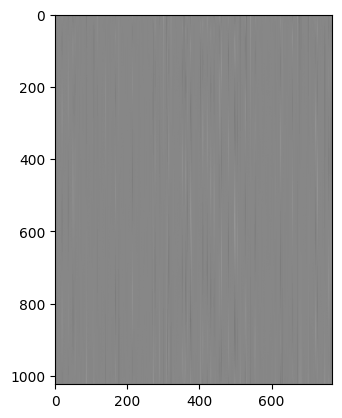

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

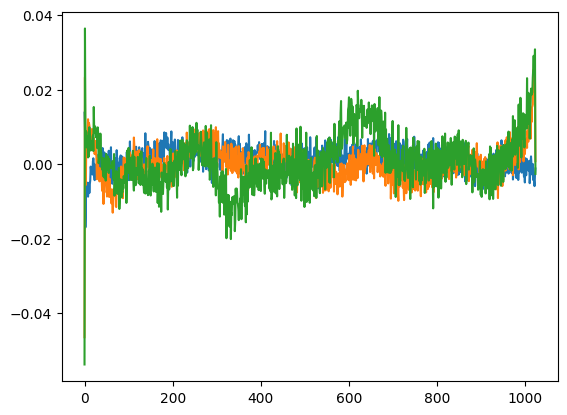

In [5]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 100])
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])

# see how for each features, have different ways of representing position from 0 to 1023. so we have 100, 150, and 200 channel.

In [8]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

set_seed(90)

In [9]:
generator("hello, who i'am and what i do for living?", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "hello, who i'am and what i do for living? The person that said she couldn't have her voice in any way, no matter how"},
 {'generated_text': "hello, who i'am and what i do for living? Is that for those 2 years or more?\n\nI do have questions on this"},
 {'generated_text': 'hello, who i\'am and what i do for living? What I do when i want to live my daily life?"\n\n"All I'},
 {'generated_text': "hello, who i'am and what i do for living? A man goes into work for his own pleasure, and when it comes to work,"},
 {'generated_text': "hello, who i'am and what i do for living? what i need as a man to live my life now? oh man, can i"}]